****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
#df1 = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#df2 = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
#df3 = pd.read_csv('WDO_2018-09-03_2018-09-28.csv')

#frames = [df1, df2, df3]
#result = pd.concat(frames)

#data_frame = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#data_frame = pd.read_csv('DOL_2018-08-01_2018-08-31.csv')
#data_frame = pd.read_csv('3_min_ITUB4_2018-09-03_2018-09-28.csv')
data_frame = pd.read_csv('PETR4_2018-09-03_2018-09-28.csv')
#data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-24.csv')
#data_frame = pd.read_csv('WDO_2018-07-02_2018-09-28.csv')
#data_frame = result

In [3]:
data_frame.count()

Start                        2320
End                          2320
NegociatedOffersAmount       2320
TotalTradedQuantity          2320
RSIIndicator                 2320
SMAIndicatorDiff             2320
EMAIndicatorDiff             2320
UpperBollingerBand           2320
LowerBollingerBand           2320
MiddleBollingerBand          2320
MACD                         2320
AroonUpIndicator             2320
AroonDownIndicator           2320
AroonIndicator               2320
PlusDirectionalIndicator     2320
MinusDirectionalIndicator    2320
ADXIndicator                 2320
CCI                          2320
CMO                          2320
ROC                          2320
BuySignal                    2320
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.5163793103448275

In [5]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,03/09/2018 11:25:00,03/09/2018 11:28:00,183,188700,0.269231,-0.024286,0.004348,0.096913,-0.048342,0.024286,...,14.285714,100.000000,-85.714286,13.471976,22.978421,0.000000,-44.585095,-65.384615,0.0,0
1,03/09/2018 11:28:00,03/09/2018 11:31:00,168,168500,0.400000,-0.040000,-0.013565,0.110602,-0.030602,0.040000,...,7.142857,92.857143,-85.714286,14.307458,20.355975,0.000000,-6.295086,-90.322581,0.0,1
2,03/09/2018 11:31:00,03/09/2018 11:34:00,147,97000,0.333333,-0.042857,-0.020423,0.107273,-0.021559,0.042857,...,7.142857,85.714286,-78.571429,12.660331,22.858221,22.209086,-33.512209,-93.750000,0.0,0
3,03/09/2018 11:34:00,03/09/2018 11:37:00,314,421700,0.344828,-0.016429,-0.000367,0.078499,-0.045642,0.016429,...,7.142857,78.571429,-71.428571,20.015043,19.188596,17.719679,-35.290132,-58.974359,0.0,1
4,03/09/2018 11:37:00,03/09/2018 11:40:00,195,163400,0.400000,0.017857,0.025682,0.039349,-0.075063,-0.017857,...,7.142857,71.428571,-64.285714,17.496279,16.773835,17.848936,-12.763672,64.102564,0.0,1


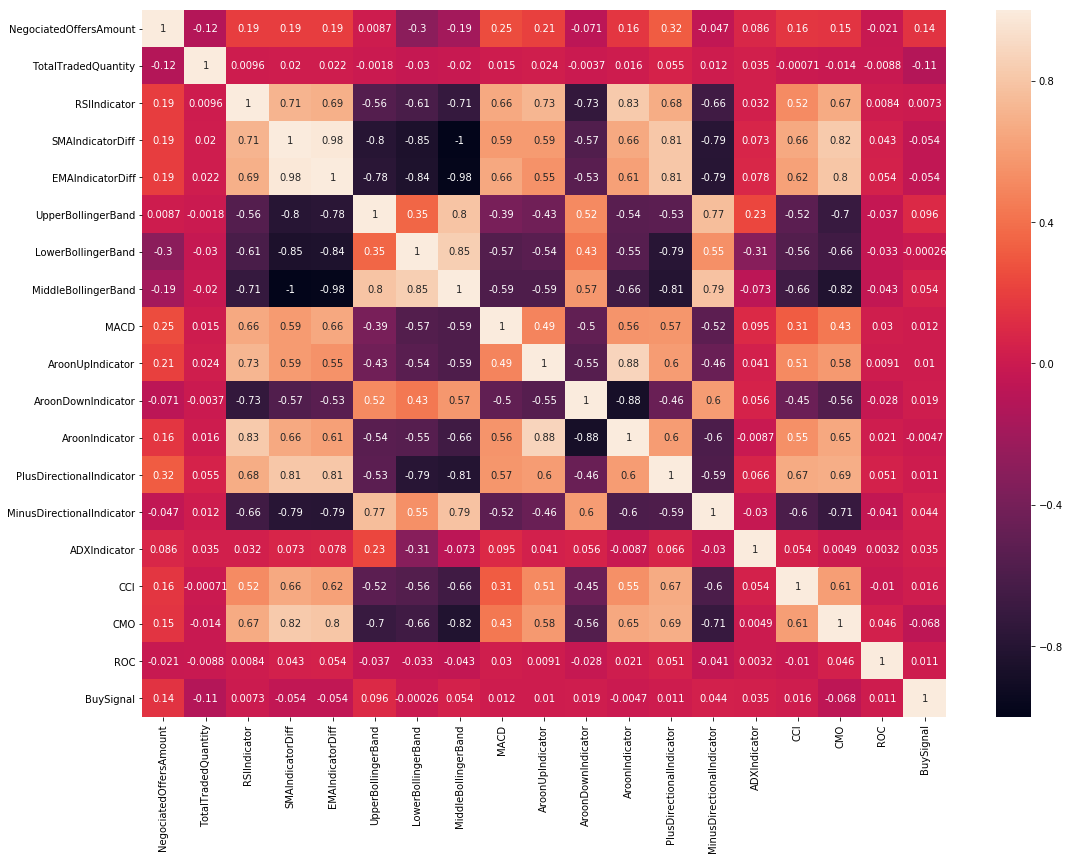

In [6]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
y_train = data_frame["BuySignal"]
x_train = data_frame.drop(["BuySignal", "Start", "End"], axis=1)
#x_train = x_train.drop(["LowerBollingerBand", "AroonUpIndicator", "AroonDownIndicator", "AroonIndicator"], axis=1)
#x_train = data_frame.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,183,188700,0.269231,-0.024286,0.004348,0.096913,-0.048342,0.024286,0.010527,14.285714,100.000000,-85.714286,13.471976,22.978421,0.000000,-44.585095,-65.384615,0.0
1,168,168500,0.400000,-0.040000,-0.013565,0.110602,-0.030602,0.040000,0.008263,7.142857,92.857143,-85.714286,14.307458,20.355975,0.000000,-6.295086,-90.322581,0.0
2,147,97000,0.333333,-0.042857,-0.020423,0.107273,-0.021559,0.042857,0.005598,7.142857,85.714286,-78.571429,12.660331,22.858221,22.209086,-33.512209,-93.750000,0.0
3,314,421700,0.344828,-0.016429,-0.000367,0.078499,-0.045642,0.016429,0.005041,7.142857,78.571429,-71.428571,20.015043,19.188596,17.719679,-35.290132,-58.974359,0.0
4,195,163400,0.400000,0.017857,0.025682,0.039349,-0.075063,-0.017857,0.006940,7.142857,71.428571,-64.285714,17.496279,16.773835,17.848936,-12.763672,64.102564,0.0


In [8]:
#x_train["NegociatedOffersAmount"].apply(np.log)
#x_train["TotalTradedQuantity"].apply(np.log)
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,5.209486,12.147914,0.269231,-0.024286,0.004348,0.096913,-0.048342,0.024286,0.010527,14.285714,100.000000,-85.714286,13.471976,22.978421,0.000000,-44.585095,-65.384615,0.0
1,5.123964,12.034691,0.400000,-0.040000,-0.013565,0.110602,-0.030602,0.040000,0.008263,7.142857,92.857143,-85.714286,14.307458,20.355975,0.000000,-6.295086,-90.322581,0.0
2,4.990433,11.482466,0.333333,-0.042857,-0.020423,0.107273,-0.021559,0.042857,0.005598,7.142857,85.714286,-78.571429,12.660331,22.858221,22.209086,-33.512209,-93.750000,0.0
3,5.749393,12.952049,0.344828,-0.016429,-0.000367,0.078499,-0.045642,0.016429,0.005041,7.142857,78.571429,-71.428571,20.015043,19.188596,17.719679,-35.290132,-58.974359,0.0
4,5.273000,12.003956,0.400000,0.017857,0.025682,0.039349,-0.075063,-0.017857,0.006940,7.142857,71.428571,-64.285714,17.496279,16.773835,17.848936,-12.763672,64.102564,0.0


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,0.605022,0.388328,0.210743,0.357753,0.412548,0.375766,0.781151,0.642247,0.409075,0.076923,1.000000,0.038462,0.160757,0.427072,0.000000,0.338629,0.173077,0.33009
1,0.592435,0.379635,0.360913,0.330891,0.372984,0.400060,0.803630,0.669109,0.401216,0.000000,0.923077,0.038462,0.172462,0.376142,0.000000,0.452233,0.048387,0.33009
2,0.572783,0.337237,0.284356,0.326007,0.357837,0.394153,0.815088,0.673993,0.391963,0.000000,0.846154,0.076923,0.149386,0.424737,0.209343,0.371482,0.031250,0.33009
3,0.684483,0.450068,0.297555,0.371184,0.402135,0.343085,0.784572,0.628816,0.390030,0.000000,0.769231,0.115385,0.252425,0.353471,0.167026,0.366207,0.205128,0.33009
4,0.614370,0.377276,0.360913,0.429792,0.459668,0.273601,0.747291,0.570208,0.396624,0.000000,0.692308,0.153846,0.217137,0.306575,0.168244,0.433041,0.820513,0.33009


Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

average_data_per_day = 120
max_days_interval = 20
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            new_mlp.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_mlp.predict(x_train[middle_range:max_range])
            
            print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            mlp_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_mlp_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            mlp_score_arr.append(mlp_score)

            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_logreg.predict(x_train[middle_range:max_range])
                  
            print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            logreg_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_logreg_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_logreg_score_arr.append(acc_mlp_score)
            logreg_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            logreg_score_arr.append(logreg_score)
        
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))

Days used to train: 1
Days to be predicted: 1
MLP (tn, fp, fn, tp): [31 29 20 40]
LogReg (tn, fp, fn, tp): [31 29 19 41]
MLP (tn, fp, fn, tp): [37 14 42 27]
LogReg (tn, fp, fn, tp): [33 18 38 31]
MLP (tn, fp, fn, tp): [ 0 57  0 63]
LogReg (tn, fp, fn, tp): [29 28 27 36]
MLP (tn, fp, fn, tp): [26 34 26 34]
LogReg (tn, fp, fn, tp): [17 43 21 39]
MLP (tn, fp, fn, tp): [28 35 19 38]
LogReg (tn, fp, fn, tp): [17 46 18 39]
MLP (tn, fp, fn, tp): [30 46 22 22]
LogReg (tn, fp, fn, tp): [38 38 22 22]
MLP (tn, fp, fn, tp): [54  0 66  0]
LogReg (tn, fp, fn, tp): [35 19 39 27]
MLP (tn, fp, fn, tp): [27 25 23 45]
LogReg (tn, fp, fn, tp): [14 38 10 58]
MLP (tn, fp, fn, tp): [39 13 46 22]
LogReg (tn, fp, fn, tp): [35 17 41 27]
MLP (tn, fp, fn, tp): [19 34 21 46]
LogReg (tn, fp, fn, tp): [11 42 11 56]
MLP (tn, fp, fn, tp): [29 31 22 38]
LogReg (tn, fp, fn, tp): [38 22 28 32]
MLP (tn, fp, fn, tp): [22 28 41 29]
LogReg (tn, fp, fn, tp): [33 17 48 22]
MLP (tn, fp, fn, tp): [17 35 20 48]
LogReg (tn, fp, fn

MLP (tn, fp, fn, tp): [43 33 28 16]
LogReg (tn, fp, fn, tp): [30 46 20 24]
MLP (tn, fp, fn, tp): [32 22 38 28]
LogReg (tn, fp, fn, tp): [23 31 24 42]
MLP (tn, fp, fn, tp): [27 25 26 42]
LogReg (tn, fp, fn, tp): [24 28 24 44]
MLP (tn, fp, fn, tp): [36 16 41 27]
LogReg (tn, fp, fn, tp): [33 19 46 22]
MLP (tn, fp, fn, tp): [33 20 36 31]
LogReg (tn, fp, fn, tp): [25 28 28 39]
MLP (tn, fp, fn, tp): [43 17 36 24]
LogReg (tn, fp, fn, tp): [44 16 39 21]
MLP (tn, fp, fn, tp): [22 28 31 39]
LogReg (tn, fp, fn, tp): [32 18 40 30]
MLP (tn, fp, fn, tp): [24 28 17 51]
LogReg (tn, fp, fn, tp): [16 36  6 62]
MLP (tn, fp, fn, tp): [32 37 15 36]
LogReg (tn, fp, fn, tp): [14 55  7 44]
MLP (tn, fp, fn, tp): [23 49 10 38]
LogReg (tn, fp, fn, tp): [27 45 12 36]
MLP (tn, fp, fn, tp): [17 31 23 49]
LogReg (tn, fp, fn, tp): [14 34 17 55]
MLP (tn, fp, fn, tp): [22 12 35 51]
LogReg (tn, fp, fn, tp): [20 14 28 58]
MLP (tn, fp, fn, tp): [12 40 11 57]
LogReg (tn, fp, fn, tp): [14 38 10 58]
MLP (tn, fp, fn, tp): [12

MLP (tn, fp, fn, tp): [22 12 40 46]
LogReg (tn, fp, fn, tp): [21 13 38 48]
MLP (tn, fp, fn, tp): [19 33  9 59]
LogReg (tn, fp, fn, tp): [18 34 14 54]
MLP (tn, fp, fn, tp): [11 10  4 15]
LogReg (tn, fp, fn, tp): [11 10  4 15]
MLP Average Accuracy Score: 0.596875
MLP Average Balanced Accuracy Score: 0.5996536741072054
MLP Average Precision Score: 0.6195157471449131
MLP Average Recall Score: 0.720577938947917
LogReg Average Accuracy Score: 0.596875
LogReg Average Balanced Accuracy Score: 0.5808994185679099
LogReg Average Precision Score: 0.60570590275333
LogReg Average Recall Score: 0.6885190543475652
Days used to train: 13
Days to be predicted: 1
MLP (tn, fp, fn, tp): [27 25 22 46]
LogReg (tn, fp, fn, tp): [29 23 20 48]
MLP (tn, fp, fn, tp): [30 39 17 34]
LogReg (tn, fp, fn, tp): [27 42  9 42]
MLP (tn, fp, fn, tp): [32 40 15 33]
LogReg (tn, fp, fn, tp): [37 35 20 28]
MLP (tn, fp, fn, tp): [13 35 19 53]
LogReg (tn, fp, fn, tp): [15 33 18 54]
MLP (tn, fp, fn, tp): [21 13 33 53]
LogReg (tn,

In [11]:
data_frame.to_csv('all-data-ever.csv')

In [12]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)


select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]

mlp = MLPClassifier(hidden_layer_sizes=[100])
scores = cross_val_score(mlp, X_train_selected, y_train, scoring = 'balanced_accuracy')

scores

array([0.61262701, 0.5322799 , 0.579393  ])

In [13]:
columns_with_support

array(['NegociatedOffersAmount', 'TotalTradedQuantity',
       'SMAIndicatorDiff', 'EMAIndicatorDiff', 'UpperBollingerBand',
       'MiddleBollingerBand', 'MinusDirectionalIndicator', 'ADXIndicator',
       'CMO'], dtype=object)

In [14]:
columns_without_support = columns[np.invert(support)]
columns_without_support

array(['RSIIndicator', 'LowerBollingerBand', 'MACD', 'AroonUpIndicator',
       'AroonDownIndicator', 'AroonIndicator', 'PlusDirectionalIndicator',
       'CCI', 'ROC'], dtype=object)

In [15]:
log_reg = LogisticRegression(C=1000)

print(cross_val_score(log_reg, X_train_selected, y_train, scoring = 'balanced_accuracy'))

[0.61338904 0.52760243 0.5966085 ]


In [16]:
print ('Univariate Statistics: Columns selected')
print(columns_with_support)
print ('Univariate Statistics: Columns without support')
print(columns_without_support)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]
columns_without_support = columns[np.invert(support)]

Univariate Statistics: Columns selected
['NegociatedOffersAmount' 'TotalTradedQuantity' 'SMAIndicatorDiff'
 'EMAIndicatorDiff' 'UpperBollingerBand' 'MiddleBollingerBand'
 'MinusDirectionalIndicator' 'ADXIndicator' 'CMO']
Univariate Statistics: Columns without support
['RSIIndicator' 'LowerBollingerBand' 'MACD' 'AroonUpIndicator'
 'AroonDownIndicator' 'AroonIndicator' 'PlusDirectionalIndicator' 'CCI'
 'ROC']


In [17]:
print ('Model-Based Feature Selection: Columns selected')
print(columns_with_support)
print ('Model-Based Feature Selection: Columns without support')
print(columns_without_support)

Model-Based Feature Selection: Columns selected
['NegociatedOffersAmount' 'TotalTradedQuantity' 'EMAIndicatorDiff'
 'UpperBollingerBand' 'MACD' 'PlusDirectionalIndicator'
 'MinusDirectionalIndicator' 'ADXIndicator' 'CCI']
Model-Based Feature Selection: Columns without support
['RSIIndicator' 'SMAIndicatorDiff' 'LowerBollingerBand'
 'MiddleBollingerBand' 'AroonUpIndicator' 'AroonDownIndicator'
 'AroonIndicator' 'CMO' 'ROC']
